# Trabajo Práctico N1. Procesamiento de Imágenes

## Ejercicio 1

Considerando que la distancia focal de un ojo humano está entre 14mm y 17mm. La distancia entre el ojo y el celular es de 30cm. Nuestro "sensor" es de 1.5mm x 1.5mm por lo tanto, el tamaño del menor punto visible es de

In [64]:
!pip install opencv-python matplotlib numpy


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


Text(0.5, 1.0, 'my picture')

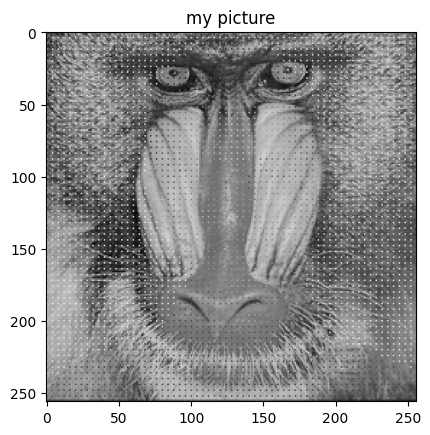

In [65]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

mono_img = cv2.imread("mono.bmp")


plt.imshow(mono_img)
plt.title('my picture')

In [66]:
def sample(offset_x: int, offset_y: int):
    return mono_img[offset_x::4, offset_y::4, :]

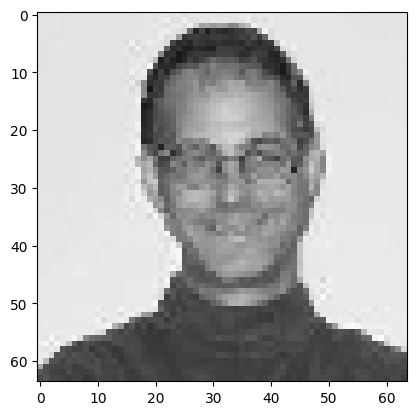

In [67]:
sample_0 = sample(0, 0)
plt.imshow(sample_0)

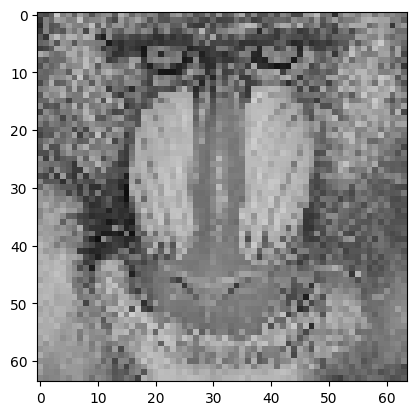

In [68]:
sample_1 = sample(1, 1)
plt.imshow(sample_1)

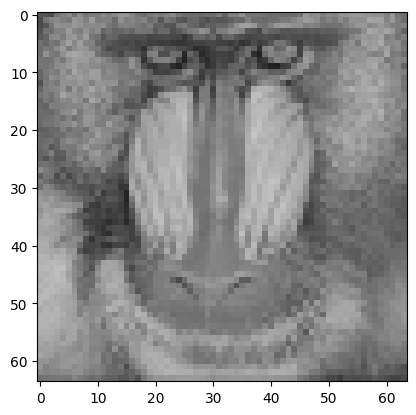

In [69]:
average = sum(sample(x, y).astype(np.float64) / 256 for x in range(4) for y in range(4)) / 16
plt.imshow(average)

In [70]:
original_size = mono_img.shape[:-1]

# TODO: implementar `bilineal` y `bicubic` a mano

def bilineal(img):
    return cv2.resize(img, original_size, interpolation=cv2.INTER_LINEAR)

def bicubic(img):
    return cv2.resize(img, original_size, interpolation=cv2.INTER_CUBIC)

def interpolate(img):
    plt.imshow(bilineal(img))
    plt.title("Bilineal")
    plt.show()
    plt.imshow(bicubic(img))
    plt.title("Bicubica")
    plt.show()

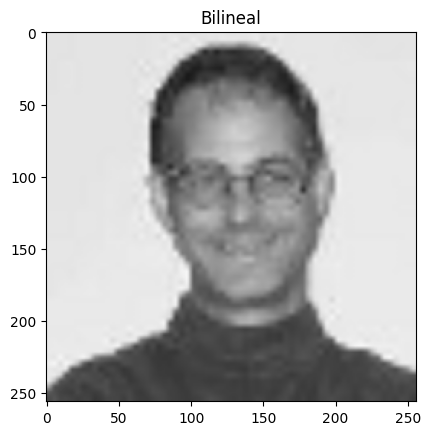

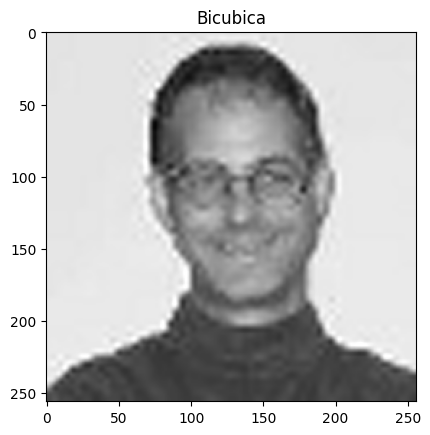

In [71]:
interpolate(sample_0)

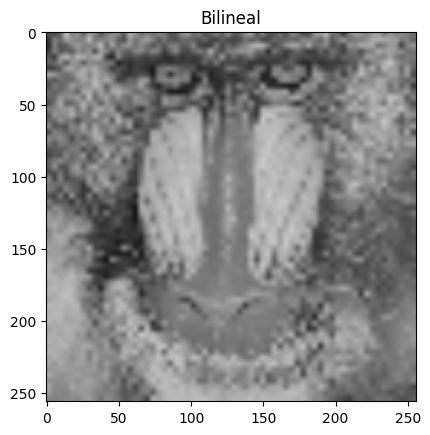

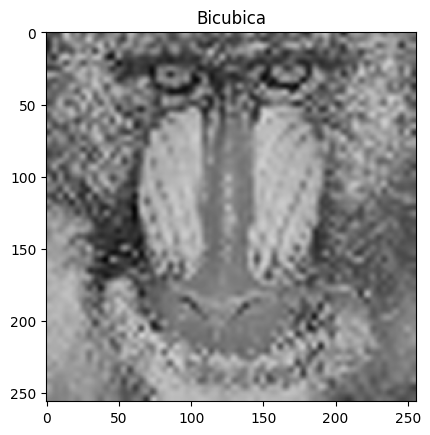

In [72]:
interpolate(sample_1)

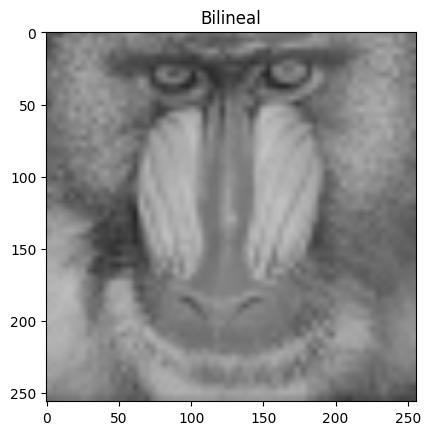

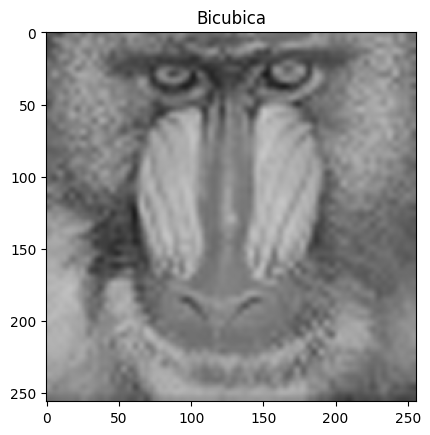

In [73]:
interpolate(average)